In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import jax
from model import ConfigurableModel
import pickle


def coeffsToComplex(coeffs):
    n = len(coeffs)
    complex_coeffs = np.zeros(n//2, dtype=complex)
    for i in range(n//2):
        complex_coeffs[i] = complex(coeffs[i], coeffs[2*i+1])
    return complex_coeffs


def buildPsiVals(kPsi, compl_ampls, x):
    val = np.zeros_like(x, dtype=float)  # Initialize val as a zero array with the same shape as x
    for ik in range(len(compl_ampls)):
        val += np.real(compl_ampls[ik] * np.exp(1j * kPsi[ik] * x))
    return val

x_range = np.arange(0, 350, 0.0001)

kpsi_path = "/home/houtlaw/iono-net/data/SAR_AF_ML_toyDataset_etc/radar_coeffs_csv_small/kPsi_20241029_193914.csv"
kpsi_df = pd.read_csv(kpsi_path)

coeffs_path = "/home/houtlaw/iono-net/data/SAR_AF_ML_toyDataset_etc/radar_coeffs_csv_small/compl_ampls_20241029_193914.csv"
coeffs_df = pd.read_csv(coeffs_path)


for col in coeffs_df.columns:
    # Replace 'i' with 'j' for Python's complex number format and convert to complex numbers
    coeffs_df[col] = coeffs_df[col].str.replace('i', 'j').apply(complex)


In [7]:
kpsi_vals = kpsi_df.iloc[:, 0].values
display(kpsi_vals)

array([0.09424778, 0.18849556, 0.28274334, 0.37699112, 0.4712389 ,
       0.56548668])

In [13]:
coeffs_vals = coeffs_df.iloc[0,:].values

In [14]:
psiVals = buildPsiVals(coeffs_sample, kpsi_df.iloc[:,0].values, x_range)
print(psiVals)

[1.97920337e+00 1.97915711e+00 1.97911087e+00 ... 3.18346131e+99
 3.18408184e+99 3.18470244e+99]


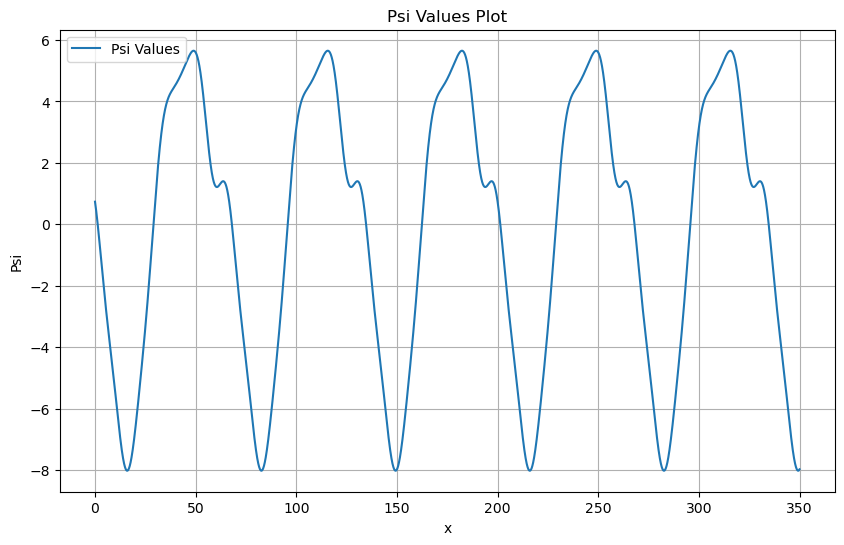

In [15]:
# Build Psi values for plotting
psiVals = buildPsiVals(kpsi_vals, coeffs_sample, x_range)

# Plot Psi values
plt.figure(figsize=(10, 6))
plt.plot(x_range, psiVals, label="Psi Values")
plt.xlabel("x")
plt.ylabel("Psi")
plt.title("Psi Values Plot")
plt.grid(True)
plt.legend()
plt.show()


## Get Model Output

In [16]:
with open('/home/houtlaw/iono-net/model/model_params_20241104_211053.pkl', 'rb') as f:
    params = pickle.load(f)

# Define the model with the same architecture as used in training
architecture = [1024,512,256,238,64,32] 
activation_fn = jax.numpy.tanh  # Load from config if required
model = ConfigurableModel(architecture=architecture, activation_fn=activation_fn)

# Run inference
def run_inference(model, params, input_data):
    output = model.apply({'params': params}, input_data, deterministic=True)
    return output

In [17]:
sample_output = run_inference(model, params, coeffs_vals)

ScopeParamShapeError: Initializer expected to generate shape (2882, 1024) but got shape (100, 1024) instead for parameter "kernel" in "/Dense_0". (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ScopeParamShapeError)